<a href="https://colab.research.google.com/github/souptikmajumder/Telecom-churn-predictions/blob/master/Case_Study___Telecom_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score 
from sklearn.metrics import precision_score
from sklearn.ensemble import RandomForestClassifier


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

df = pd.read_csv('telecom_churn_data.csv')

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
df.shape

(99999, 226)

Original Dataset has `99999` rows and `226` columns

In [0]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [0]:
df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

Since, the analysis is for high value customers,hence we should look for customers who pay an amount greater than 70 th percentile of average recharge done in the first two months(6,7)

In [0]:
# prepare a derived column for high return customer based on condition given
# prepare a column for usage of data ..separate for 2g and 3g 
# prepare a column for usage of mobile data..3g use max or 2g max?
# customer spends mostly call services / data services ? (done)


In [0]:
df['avg_rech_good_month']= (df['total_rech_amt_6']+df['total_rech_amt_7'])/2

In [0]:
df['avg_rech_good_month'].quantile(0.7)

368.5

In [0]:
df_high_end_cus= df[df['avg_rech_good_month']>=368.5]

In [0]:
df_high_end_cus.shape

(30011, 227)

In [0]:
df_high_end_cus.isna().sum()/len(df_high_end_cus) *100  # % of missing data /NA Values in the dataframe

mobile_number                0.000000
circle_id                    0.000000
loc_og_t2o_mou               0.379861
std_og_t2o_mou               0.379861
loc_ic_t2o_mou               0.379861
last_date_of_month_6         0.000000
last_date_of_month_7         0.103295
last_date_of_month_8         0.523142
last_date_of_month_9         1.199560
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  1.052947
onnet_mou_7                  1.009630
onnet_mou_8                  3.125521
onnet_mou_9                  5.677918
offnet_mou_6                 1.052947
offnet_mou_7                 1.009630
offnet_mou_8                 3.125521
offnet_mou_9                 5.677918
roam_ic_mou_6                1.052947
roam_ic_mou_7                1.009630
roam_ic_mou_8                3.125521
roam_ic_mou_9                5.677918
roam_og_mou_6                1.052947
roam_og_mou_

As we see that few columns like `date_of_last_rech_data_6`,`date_of_last_rech_data_7`,`date_of_last_rech_data_8`,
`date_of_last_rech_data_9`,`total_rech_data_6`,`total_rech_data_7`,`total_rech_data_8`,`total_rech_data_9`,
`max_rech_data_6`,`max_rech_data_7`,`max_rech_data_8`,`max_rech_data_9`,`count_rech_2g_6`,`count_rech_2g_7`,
`count_rech_2g_8`,`count_rech_2g_9`,`count_rech_3g_6`,`count_rech_3g_7`,`count_rech_3g_8`,`count_rech_3g_9`,
`av_rech_amt_data_6`,`av_rech_amt_data_7`,`av_rech_amt_data_8`,`av_rech_amt_data_9`,`arpu_3g_6`,`arpu_3g_7`,
`arpu_3g_8`,`arpu_3g_9`,`fb_user_6`,`fb_user_7`,`fb_user_8`,`fb_user_9` have high null values , i.e above 50 percent . Hence, we can drop them based on their significance.

For columns like `fb_user_6`,`fb_user_7`,`fb_user_8`,`fb_user_9`, as because usage of facebook might not be a factor for deciding whether customer will churn or not.

In [0]:
df_high_end_cus = df_high_end_cus.drop(columns=['fb_user_6','fb_user_7','fb_user_8','fb_user_9'],axis=1)

For columns like `count_rech_2g_6`,`count_rech_2g_7`,`count_rech_2g_8`,`count_rech_2g_9`, `count_rech_3g_6`,
`count_rech_3g_7`,`count_rech_3g_8`,`count_rech_3g_9`, we should not remove these columns as they might be helpful in predicting churning of customers. 

For columns like `max_rech_data_9`,`max_rech_data_8`,`max_rech_data_7`,`max_rech_data_6`, `total_rech_data_9`,
`total_rech_data_8`,`total_rech_data_7`,`total_rech_data_6`, we retain recharge data.

For columns like `arpu_3g_9`,`arpu_3g_8`,`arpu_3g_7`,`arpu_3g_6`, `arpu_2g_9`,
`arpu_2g_8`,`arpu_2g_7`,`arpu_2g_6`, we should retain this column as the average revenue of internet users can also help in predicting churning.

Similarly for other columns with high null values , we remove the columns

In [0]:
cols_to_retain = ['count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_2g_9','count_rech_3g_6',
                 'count_rech_3g_7','count_rech_3g_8','count_rech_3g_9','max_rech_data_9','max_rech_data_8',
                 'max_rech_data_7','max_rech_data_6','total_rech_data_9','total_rech_data_8','total_rech_data_7',
                 'total_rech_data_6','arpu_2g_6','arpu_2g_7','arpu_2g_8','arpu_2g_9','arpu_3g_9','arpu_3g_8','arpu_3g_7','arpu_3g_6']

df_high_end_cus[cols_to_retain] = df_high_end_cus[cols_to_retain].fillna(df_high_end_cus[cols_to_retain].median())

In [0]:
# for columns like like night pack user or not we can remove those columns as already the recharges have been covered.

df_high_end_cus = df_high_end_cus.drop(columns=['night_pck_user_6','night_pck_user_7','night_pck_user_8',
                                                'night_pck_user_9'],axis=1)

Since , columns are numeric , we can use mean values for respective columns to impute missing values. 

In [0]:
df_high_end_cus = df_high_end_cus.fillna(df_high_end_cus.median())

In [0]:
df_high_end_cus.isna().sum() /len(df_high_end_cus) *100

mobile_number                0.000000
circle_id                    0.000000
loc_og_t2o_mou               0.000000
std_og_t2o_mou               0.000000
loc_ic_t2o_mou               0.000000
last_date_of_month_6         0.000000
last_date_of_month_7         0.103295
last_date_of_month_8         0.523142
last_date_of_month_9         1.199560
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  0.000000
onnet_mou_7                  0.000000
onnet_mou_8                  0.000000
onnet_mou_9                  0.000000
offnet_mou_6                 0.000000
offnet_mou_7                 0.000000
offnet_mou_8                 0.000000
offnet_mou_9                 0.000000
roam_ic_mou_6                0.000000
roam_ic_mou_7                0.000000
roam_ic_mou_8                0.000000
roam_ic_mou_9                0.000000
roam_og_mou_6                0.000000
roam_og_mou_

For dates we have to handle data bit differently `date_of_last_rech_data_9`,`date_of_last_rech_data_8`,
`date_of_last_rech_data_7`,`date_of_last_rech_data_6`,`last_date_of_month_6`,`last_date_of_month_7`,`last_date_of_month_8`,`last_date_of_month_9`.. we separate the dates as separate column for each month

In [0]:
date_cols = ['date_of_last_rech_data_9','date_of_last_rech_data_8','date_of_last_rech_data_7','date_of_last_rech_data_6',
               'last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9',
            'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9']

In [0]:
#df_high_end_cus[date_cols] = df_high_end_cus[date_cols].astype('datetime64[ns]')

In [0]:
df_high_end_cus[date_cols].isna().sum()

date_of_last_rech_data_9    18550
date_of_last_rech_data_8    18257
date_of_last_rech_data_7    18349
date_of_last_rech_data_6    18614
last_date_of_month_6            0
last_date_of_month_7           31
last_date_of_month_8          157
last_date_of_month_9          360
date_of_last_rech_6            62
date_of_last_rech_7           114
date_of_last_rech_8           594
date_of_last_rech_9           866
dtype: int64

In [0]:
#extracting days from the datetime format columns
df_high_end_cus['date_last_rech_data_9'] = pd.to_datetime(df_high_end_cus['date_of_last_rech_data_9']).dt.day
df_high_end_cus['date_last_rech_data_8'] = pd.to_datetime(df_high_end_cus['date_of_last_rech_data_8']).dt.day
df_high_end_cus['date_last_rech_data_7'] = pd.to_datetime(df_high_end_cus['date_of_last_rech_data_7']).dt.day
df_high_end_cus['date_last_rech_data_6'] = pd.to_datetime(df_high_end_cus['date_of_last_rech_data_6']).dt.day
df_high_end_cus['date_last_rech_6'] = pd.to_datetime(df_high_end_cus['date_of_last_rech_6']).dt.day
df_high_end_cus['date_last_rech_7'] = pd.to_datetime(df_high_end_cus['date_of_last_rech_7']).dt.day
df_high_end_cus['date_last_rech_8'] = pd.to_datetime(df_high_end_cus['date_of_last_rech_8']).dt.day
df_high_end_cus['date_last_rech_9'] = pd.to_datetime(df_high_end_cus['date_of_last_rech_9']).dt.day
df_high_end_cus['last_date_@_month_6'] = pd.to_datetime(df_high_end_cus['last_date_of_month_6']).dt.day
df_high_end_cus['last_date_@_month_7'] = pd.to_datetime(df_high_end_cus['last_date_of_month_7']).dt.day
df_high_end_cus['last_date_@_month_8'] = pd.to_datetime(df_high_end_cus['last_date_of_month_8']).dt.day
df_high_end_cus['last_date_@_month_9'] = pd.to_datetime(df_high_end_cus['last_date_of_month_9']).dt.day


In [0]:
df_high_end_cus = df_high_end_cus.drop(columns = date_cols,axis=1) # sropping all the original date-time columns

In [0]:
df_high_end_cus = df_high_end_cus.fillna(df_high_end_cus.median()) # filling columns with days ..with median 

In [0]:
df_high_end_cus.isna().sum()

mobile_number            0
circle_id                0
loc_og_t2o_mou           0
std_og_t2o_mou           0
loc_ic_t2o_mou           0
arpu_6                   0
arpu_7                   0
arpu_8                   0
arpu_9                   0
onnet_mou_6              0
onnet_mou_7              0
onnet_mou_8              0
onnet_mou_9              0
offnet_mou_6             0
offnet_mou_7             0
offnet_mou_8             0
offnet_mou_9             0
roam_ic_mou_6            0
roam_ic_mou_7            0
roam_ic_mou_8            0
roam_ic_mou_9            0
roam_og_mou_6            0
roam_og_mou_7            0
roam_og_mou_8            0
roam_og_mou_9            0
loc_og_t2t_mou_6         0
loc_og_t2t_mou_7         0
loc_og_t2t_mou_8         0
loc_og_t2t_mou_9         0
loc_og_t2m_mou_6         0
loc_og_t2m_mou_7         0
loc_og_t2m_mou_8         0
loc_og_t2m_mou_9         0
loc_og_t2f_mou_6         0
loc_og_t2f_mou_7         0
loc_og_t2f_mou_8         0
loc_og_t2f_mou_9         0
l

In [0]:
df_high_end_cus.shape # final shape of dataset after null value treatment

(30011, 219)

In [0]:
churn_attrs = ['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']



In [0]:
df_high_end_cus['churn'] = df_high_end_cus.apply(lambda row:1 if ((row.total_ic_mou_9 == 0 or row.total_og_mou_9==0)
                                                                  and (row.vol_2g_mb_9 == 0 or row.vol_3g_mb_9 ==0))
                                                                else 0 , axis = 1)
    

In [0]:
df_high_end_cus['churn'].value_counts()

0    26964
1     3047
Name: churn, dtype: int64

so , as we see a customer churns churns `if he/she does not any call service(incoming/outgoing) or internet services (2G/3G)`. Based on the interpretation above :

1. `3047 churned customers`
2. `26964 non-churned customers`

In [0]:
# Now , we drop all the columns that act as data from the churn month - i.e month of september(9)

In [0]:
drop_churn_cols = []
col_list = df_high_end_cus.columns.values
for x in range(len(col_list)):
    if(col_list[x][-1]=='9'):
        drop_churn_cols.append(col_list[x])

In [0]:
drop_churn_cols 

['arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'last_day_rch_amt_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9',
 'date_last_rech_data_9',
 'date_last_rech_9',
 'last_date_@_month_9']

In [0]:
df_high_end_cus=df_high_end_cus.drop(drop_churn_cols,axis=1)

In [0]:
df_high_end_cus.shape #final dataframe after removing all churn month attributes and null value treated

(30011, 168)

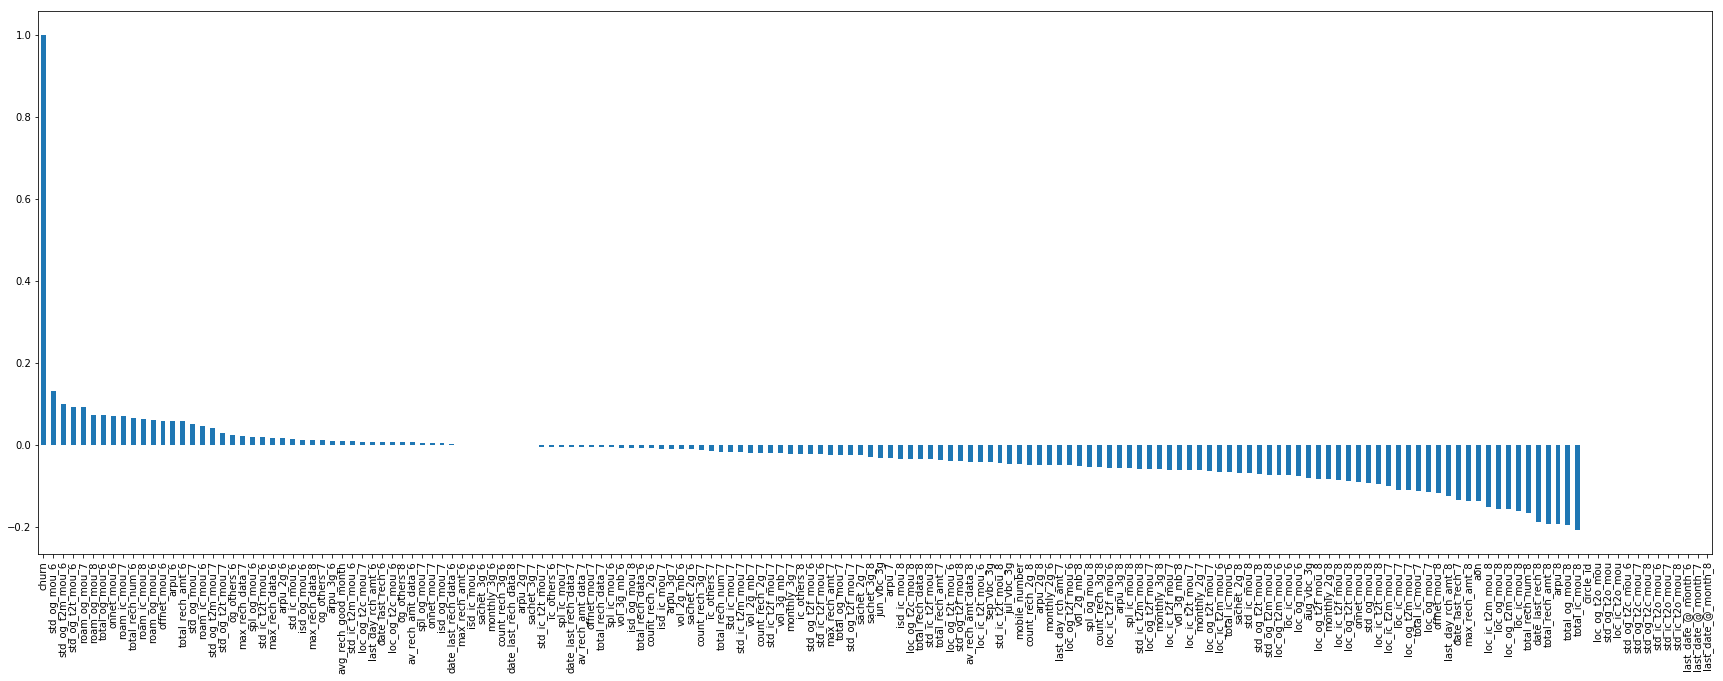

In [0]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(30,10))
df_high_end_cus.corr()['churn'].sort_values(ascending = False).plot(kind='bar')
plt.show()

Text(0.5, 1.0, 'Relation between revenue and churn rate')

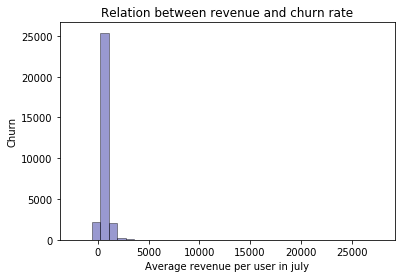

In [0]:
ax = sns.distplot(df_high_end_cus['arpu_6'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('Churn')
ax.set_xlabel('Average revenue per user in july')
ax.set_title('Relation between revenue and churn rate')

Text(0.5, 1.0, 'Relation between revenue and churn rate')

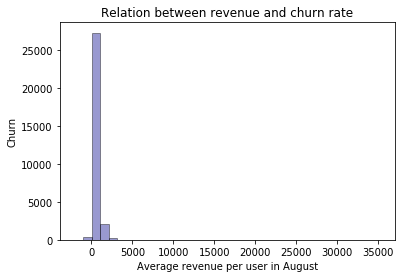

In [0]:
ax = sns.distplot(df_high_end_cus['arpu_7'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('Churn')
ax.set_xlabel('Average revenue per user in August')
ax.set_title('Relation between revenue and churn rate')

In [0]:
df_high_end_cus=df_high_end_cus.drop(columns=['mobile_number','circle_id'])

We can drop column `mobile_number`,`circle_id` as it does not help in predicting churning

In [0]:
df_high_end_cus.corr()


,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_good_month,date_last_rech_data_8,date_last_rech_data_7,date_last_rech_data_6,date_last_rech_6,date_last_rech_7,date_last_rech_8,last_date_@_month_6,last_date_@_month_7,last_date_@_month_8,churn
loc_og_t2o_mou,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std_og_t2o_mou,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loc_ic_t2o_mou,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

`We see above from the above heatmap that some of the correlation have Null Values(whitespaces) as these columns have same value and do not change, hence the standard deviation of these variables is 0 , which leads to Null values of correlation.`

#### Factor Analysis to check for multicollinearity

In [0]:
from sklearn.decomposition import FactorAnalysis
FA = FactorAnalysis(n_components = 3).fit_transform(df_high_end_cus.values)

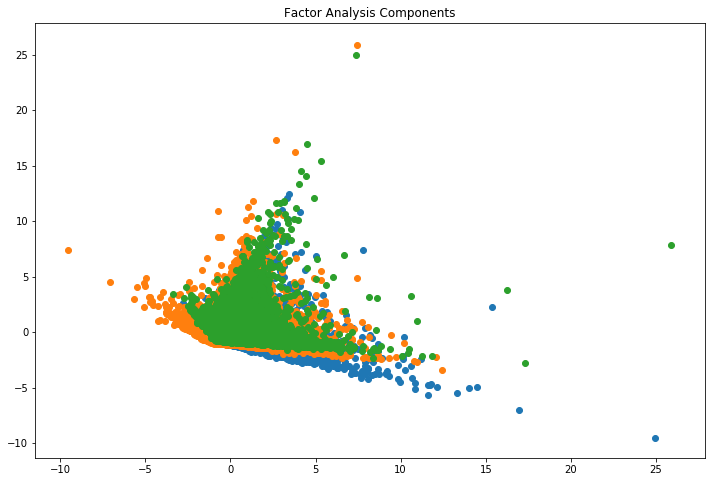

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.title('Factor Analysis Components')
plt.scatter(FA[:,0], FA[:,1])
plt.scatter(FA[:,1], FA[:,2])
plt.scatter(FA[:,2], FA[:,0])



We see that, the data is highly correlated and hence, we have to remove multicollinearity. 
Here, every group of factor is a set of highly correlated variables/columns

In [0]:
#report = pp.ProfileReport(df_high_end_cus)
#report.to_file('output_report.html')

Dropping variables with `high multicollinearity` as per report from pandas-profile. 

In [0]:
df_high_end_cus = df_high_end_cus.drop(columns=['arpu_3g_6','arpu_3g_7','arpu_3g_8','isd_og_mou_7','isd_og_mou_8',
                                               'sachet_2g_6','sachet_2g_7','sachet_2g_8','total_rech_amt_6',
                                               'total_rech_amt_7','total_rech_amt_8'])

Dropping variables with `constant values` as per report from pandas-profile. 

In [0]:
df_high_end_cus = df_high_end_cus.drop(columns=['last_date_@_month_6','last_date_@_month_7','last_date_@_month_8',
                                               'loc_ic_t2o_mou','loc_og_t2o_mou','std_ic_t2o_mou_6','std_ic_t2o_mou_7',
                                               'std_ic_t2o_mou_8','std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8',
                                               'std_og_t2o_mou'])

In [0]:
df_high_end_cus.shape

(30011, 143)

Now, identifying `skewed columns` and do the necessary transformations.

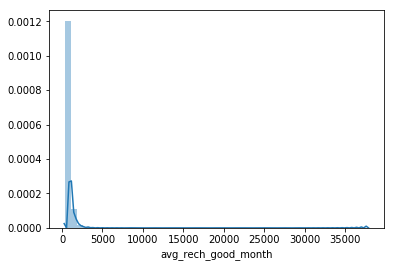

In [0]:
sns.distplot(df_high_end_cus['avg_rech_good_month'])
plt.show()

In [0]:
#since, the column avg_rech_good_month is highly skewed, we can do log transformation.

In [0]:
df_high_end_cus['avg_rech_good_month_trnsfrm'] = np.log(df_high_end_cus['avg_rech_good_month'])
df_high_end_cus = df_high_end_cus.drop(columns=['avg_rech_good_month'])

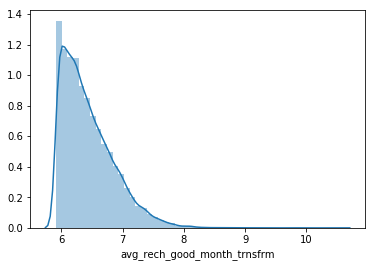

In [0]:
sns.distplot(df_high_end_cus['avg_rech_good_month_trnsfrm'])
plt.show()

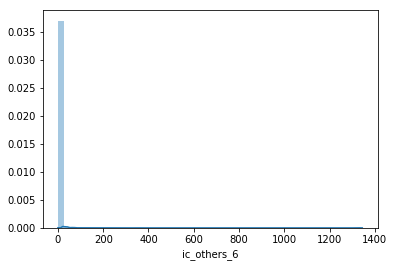

In [0]:
sns.distplot(df_high_end_cus['ic_others_6'])
plt.show()

In [0]:
df_high_end_cus['ic_others_6_trnsfrm']=np.sqrt(df_high_end_cus['ic_others_6'])
df_high_end_cus['ic_others_8_trnsfrm']=np.sqrt(df_high_end_cus['ic_others_8'])
df_high_end_cus['isd_ic_mou_7_trnsfrm']=np.sqrt(df_high_end_cus['isd_ic_mou_7'])
df_high_end_cus['isd_ic_mou_6_trnsfrm']=np.sqrt(df_high_end_cus['isd_ic_mou_6'])
df_high_end_cus['loc_og_t2c_mou_7_trnsfrm']=np.sqrt(df_high_end_cus['loc_og_t2c_mou_7'])
df_high_end_cus['og_others_7_trnsfrm']=np.sqrt(df_high_end_cus['og_others_7'])
df_high_end_cus['og_others_8_trnsfrm']=np.sqrt(df_high_end_cus['og_others_8'])
df_high_end_cus['spl_ic_mou_6_trnsfrm']=np.sqrt(df_high_end_cus['spl_ic_mou_6'])
df_high_end_cus['spl_ic_mou_7_trnsfrm']=np.sqrt(df_high_end_cus['spl_ic_mou_7'])
df_high_end_cus['std_ic_t2f_mou_6_trnsfrm']=np.sqrt(df_high_end_cus['std_ic_t2f_mou_6'])
df_high_end_cus['std_ic_t2f_mou_7_trnsfrm']=np.sqrt(df_high_end_cus['std_ic_t2f_mou_7'])
df_high_end_cus['std_ic_t2f_mou_8_trnsfrm']=np.sqrt(df_high_end_cus['std_ic_t2f_mou_8'])
df_high_end_cus['std_ic_t2t_mou_6_trnsfrm']=np.sqrt(df_high_end_cus['std_ic_t2t_mou_6'])
df_high_end_cus['std_ic_t2t_mou_7_trnsfrm']=np.sqrt(df_high_end_cus['std_ic_t2t_mou_7'])
df_high_end_cus['std_ic_t2t_mou_8_trnsfrm']=np.sqrt(df_high_end_cus['std_ic_t2t_mou_8'])

cols_skewed_sqrt = ['ic_others_6','ic_others_8','isd_ic_mou_7','isd_ic_mou_6','loc_og_t2c_mou_7','og_others_7',
                   'og_others_8','spl_ic_mou_6','spl_ic_mou_7','std_ic_t2f_mou_6','std_ic_t2f_mou_7','std_ic_t2f_mou_8',
                   'std_ic_t2t_mou_6','std_ic_t2t_mou_7','std_ic_t2t_mou_8']


df_high_end_cus = df_high_end_cus.drop(columns=cols_skewed_sqrt,axis=1)

In [0]:
#report_1 = pp.ProfileReport(df_high_end_cus)
#report_1.to_file('output_report_2.html')

In [0]:
df_high_end_cus['ic_others_7_trnsfrm']=np.sqrt(df_high_end_cus['ic_others_7'])
df_high_end_cus['isd_og_mou_6_trnsfrm']=np.sqrt(df_high_end_cus['isd_og_mou_6'])

df_high_end_cus = df_high_end_cus.drop(columns=['ic_others_7','isd_og_mou_6'])


In [0]:
FA_1 = FactorAnalysis(n_components = 3).fit_transform(df_high_end_cus.values)

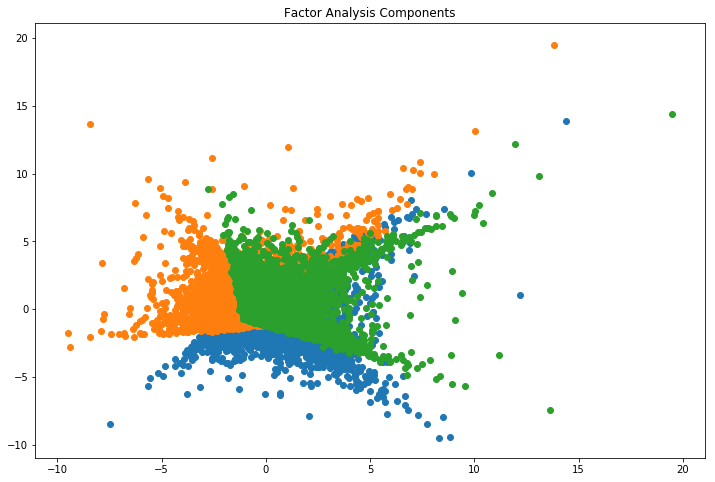

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.title('Factor Analysis Components')
plt.scatter(FA_1[:,0],FA_1[:,1])
plt.scatter(FA_1[:,1], FA_1[:,2])
plt.scatter(FA_1[:,2],FA_1[:,0])
plt.show()


In [0]:
#report_2 = pp.ProfileReport(df_high_end_cus)
#report_2.to_file('output_report_3.html')

As we can see from the above factor plot, that the multicollinearity among the datasets have been reduced due to 
removal of the above mentioned columns as per pandas profiling.

In [0]:
df_high_end_cus.corr()['churn'].sort_values(ascending = False)

churn                          1.000000
std_og_mou_6                   0.131846
std_og_t2m_mou_6               0.099027
std_og_t2t_mou_6               0.093168
roam_og_mou_7                  0.092717
roam_og_mou_8                  0.072746
total_og_mou_6                 0.072193
onnet_mou_6                    0.071193
roam_ic_mou_7                  0.069398
total_rech_num_6               0.064926
roam_ic_mou_8                  0.063417
roam_og_mou_6                  0.061005
offnet_mou_6                   0.058547
arpu_6                         0.058299
std_og_mou_7                   0.049341
roam_ic_mou_6                  0.045281
std_og_t2m_mou_7               0.039915
std_ic_t2t_mou_6_trnsfrm       0.032413
std_og_t2t_mou_7               0.029499
isd_og_mou_6_trnsfrm           0.027086
og_others_6                    0.023838
max_rech_data_7                0.021388
spl_og_mou_6                   0.019219
max_rech_data_6                0.016762
arpu_2g_6                      0.016439


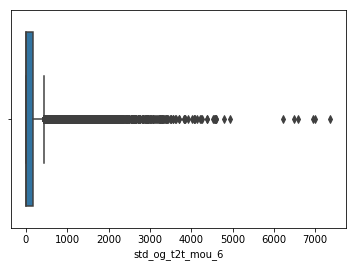

In [0]:
sns.boxplot(df_high_end_cus['std_og_t2t_mou_6'])

In [0]:
df_high_end_cus.std_og_t2t_mou_6.quantile(0.99)

1885.1980000000017

In [0]:
max(df_high_end_cus['std_og_t2t_mou_6'])

7366.58

As we can see that for the column `std_og_t2t_mou_6`,there is a significant difference between the maximum value 
and the value of 99 th percentile, this shows there are clearly many outliers.

<b>As a strategy to remove outliers, we retain values till 99th percentile of the top 10 correlated columns with
column churn.</b>

In [0]:
churn_corr_cols = ['std_og_mou_6','std_og_t2m_mou_6','std_og_t2t_mou_6','roam_og_mou_7','roam_og_mou_8','total_og_mou_6',
                  'onnet_mou_6','roam_ic_mou_7','total_rech_num_6','roam_ic_mou_8']

In [0]:
df_high_end_cus = df_high_end_cus[df_high_end_cus.std_og_mou_6 < df_high_end_cus.std_og_mou_6.quantile(.99)]
df_high_end_cus = df_high_end_cus[df_high_end_cus.std_og_t2m_mou_6 < df_high_end_cus.std_og_t2m_mou_6.quantile(.99)]
df_high_end_cus = df_high_end_cus[df_high_end_cus.std_og_t2t_mou_6 < df_high_end_cus.std_og_t2t_mou_6.quantile(.99)]
df_high_end_cus = df_high_end_cus[df_high_end_cus.roam_og_mou_7 < df_high_end_cus.roam_og_mou_7.quantile(.99)]
df_high_end_cus = df_high_end_cus[df_high_end_cus.roam_og_mou_8 < df_high_end_cus.roam_og_mou_8.quantile(.99)]
df_high_end_cus = df_high_end_cus[df_high_end_cus.total_og_mou_6 < df_high_end_cus.total_og_mou_6.quantile(.99)]
df_high_end_cus = df_high_end_cus[df_high_end_cus.onnet_mou_6 < df_high_end_cus.onnet_mou_6.quantile(.99)]
df_high_end_cus = df_high_end_cus[df_high_end_cus.roam_ic_mou_7 < df_high_end_cus.roam_ic_mou_7.quantile(.99)]
df_high_end_cus = df_high_end_cus[df_high_end_cus.total_rech_num_6 < df_high_end_cus.total_rech_num_6.quantile(.99)]
df_high_end_cus = df_high_end_cus[df_high_end_cus.roam_ic_mou_8 < df_high_end_cus.roam_ic_mou_8.quantile(.99)]




In [0]:
df_high_end_cus.shape #after maximum possible outlier treatment

(27134, 143)

### Splitting into train - test data

In [0]:
X = df_high_end_cus.drop(columns=['churn'],axis=1)
y = df_high_end_cus['churn']

In [0]:
# split into train and test with ratio of 80% and 20%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.8,
                                                    test_size = 0.2, random_state=100)

### Handling Class Imbalance

In [0]:
y_train.value_counts()

0    19739
1     1968
Name: churn, dtype: int64

In [0]:
y_test.value_counts()

0    4910
1     517
Name: churn, dtype: int64

As , we see there is  a clear class imbalance of the customers who have churned and not churned. So, we apply
methods like `SMOTE`(Synthetic Minority OverSampling Technique) to upsample the minority class of data points in 
`churn` column.

In [0]:
!pip install imblearn
from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


In [0]:
sm = SMOTE(random_state=27, ratio=1.0)
X_train, y_train = sm.fit_sample(X_train, y_train)

In [0]:
np.bincount(y_train) #19739 rows of each class for the column churn

array([19739, 19739])

In [0]:
# Converting n-arrays to dataframe
X_train_df = pd.DataFrame(X_train)
y_train_df = pd.DataFrame(y_train)

In [0]:
X_train_df.columns = X.columns

### Feature Scaling

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
scaler = StandardScaler()

X_train_df_scaled = scaler.fit_transform(X_train_df)

## Logistic Regression

Model with simple `logistic regression` using `SAGA (Stochastic Average Gradient descent solver)` that includes 
both L1 and L2 regularisation.

In [0]:
smote = LogisticRegression(solver='saga').fit(X_train_df_scaled, y_train_df)

In [0]:
X_test = scaler.transform(X_test)

In [0]:
smote_pred = smote.predict(X_test)

In [0]:
print(accuracy_score(y_test, smote_pred))
    #0.84

# f1 score
print(f1_score(y_test, smote_pred))
    #0.51

print(recall_score(y_test, smote_pred))
    #0.83
    
print(precision_score(y_test, smote_pred))
   #0.37

0.8494564215957251
0.5145573380867499
0.8375241779497099
0.3713550600343053


### Logistic Regression with PCA

In [0]:
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import explained_variance_score

In [0]:
pca = PCA(n_components=40,random_state=100,svd_solver='randomized')

In [0]:
Xtrain_reduced = pca.fit_transform(X_train_df_scaled)
Xtest_reduced = pca.transform(X_test)

regrpca = LogisticRegression()

# Train the model using the principal components of the transformed training sets
regrpca.fit(Xtrain_reduced, y_train_df)
# Make predictions using the principal components of the transformed testing set
y_pred = regrpca.predict(Xtest_reduced)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('R2 score: %.2f' % r2_score(y_test, y_pred))


Mean squared error: 0.19
R2 score: -1.15


In [0]:
sum(pca.explained_variance_ratio_)

0.7986403605500407

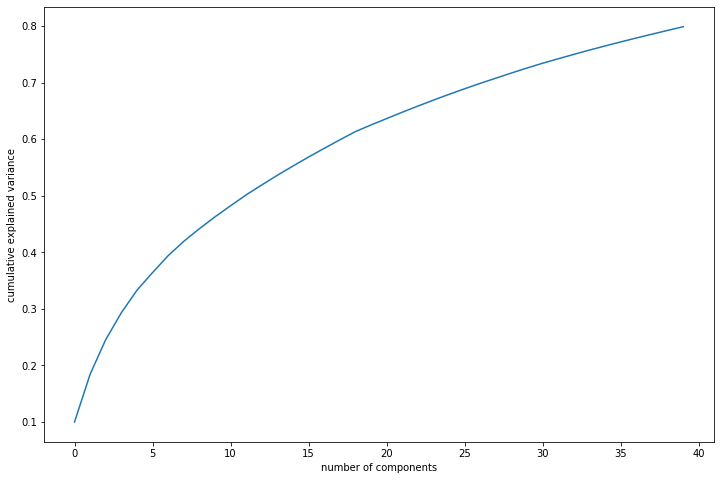

In [0]:
#plotting a scree plot
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [0]:
print(accuracy_score(y_test, y_pred))
    #0.76

# f1 score
print(f1_score(y_test, y_pred))
    #0.393

print(recall_score(y_test, y_pred))
    #0.814
    
print(precision_score(y_test, y_pred))
   #0.259

0.8148148148148148
0.45646295294753925
0.816247582205029
0.31681681681681684


We see that the accuracy scores, precision,recall scores are pretty low for logistic regression model with PCA
components

# Random Forest Classifier

#### Default Hyperparameters
Let's first fit a random forest model with default hyperparameters.

In [0]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [0]:
# fit
rfc.fit(X_train_df_scaled,y_train_df)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
# Making predictions
predictions = rfc.predict(X_test)

In [0]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [0]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      4910
           1       0.60      0.58      0.59       517

    accuracy                           0.92      5427
   macro avg       0.78      0.77      0.77      5427
weighted avg       0.92      0.92      0.92      5427



In [0]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[4710  200]
 [ 219  298]]


In [0]:
print(accuracy_score(y_test,predictions))

0.9227934402063755


Tuning max_depth
Let's try to find the optimum values for max_depth and understand how the value of max_depth impacts the overall accuracy of the ensemble.

In [0]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train_df_scaled, y_train_df)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [0]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.757850,0.015351,0.013094,0.000168,10,{'n_estimators': 10},0.856383,0.878040,0.855750,0.877280,0.869014,0.867293,0.009700,18
1,1.141309,0.051673,0.018442,0.002341,15,{'n_estimators': 15},0.854610,0.884625,0.873100,0.872087,0.872688,0.871422,0.009611,17
2,1.702293,0.073858,0.021935,0.000364,20,{'n_estimators': 20},0.855243,0.888425,0.876013,0.881079,0.883456,0.876843,0.011516,12
3,2.179151,0.201112,0.026109,0.000541,25,{'n_estimators': 25},0.857776,0.885005,0.876266,0.877026,0.876742,0.874563,0.008995,15
4,2.357287,0.108186,0.032929,0.005536,30,{'n_estimators': 30},0.851064,0.889058,0.881206,0.876646,0.871548,0.873904,0.012789,16


In [0]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["split0_test_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

KeyError: 'param_max_depth'

<Figure size 432x288 with 0 Axes>

### Tuning n_estimators

In [0]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(10, 100, 5)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train_df_scaled, y_train_df)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='w

In [0]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

In [0]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Tuning max_features

In [0]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train_df_scaled, y_train_df)

In [0]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

In [0]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


### Tuning min_samples_leaf

In [0]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train_df_scaled, y_train_df)

In [0]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

In [0]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Tuning min_samples_split

In [0]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train_df_scaled, y_train_df)

In [0]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

In [0]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Grid Search to Find Optimal Hyperparameters

In [0]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [0]:
# Fit the grid search to the data
grid_search.fit(X_train_df_scaled, y_train_df)

In [0]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

Fitting the final model with the best parameters obtained from grid search

In [0]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=100)

In [0]:
# fit
rfc.fit(X_train_df_scaled, y_train_df)

In [0]:
# predict
predictions = rfc.predict(X_test)

In [0]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix

In [0]:
print(classification_report(y_test,predictions))

In [0]:
print(confusion_matrix(y_test,predictions))

## Model Building

Let's build a linear SVM mode now. The ```SVC()``` class does that in sklearn. We highly recommend reading the documentation at least once.

In [0]:
help(SVC)

In [0]:
# Model building

# instantiate an object of class SVC()
# note that we are using cost C=1
model = SVC(C = 1)

# fit
model.fit(X_train_df_scaled, y_train_df)

# predict
y_pred = model.predict(smote_pred)

In [0]:
# Evaluate the model using confusion matrix 
from sklearn import metrics
metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)

In [0]:
# print other metrics

# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred))

# precision
print("precision", metrics.precision_score(y_test, y_pred))

# recall/sensitivity
print("recall", metrics.recall_score(y_test, y_pred))


In [0]:
# specificity (% of hams correctly classified)
print("specificity", 811/(811+38))

## Hyperparameter Tuning

In [0]:
help(metrics.confusion_matrix)

### K-Fold Cross Validation

Let's first run a simple k-fold cross validation to get a sense of the **average metrics** as computed over multiple *folds*. the easiest way to do cross-validation is to use the ```cross_val_score()``` function.

In [0]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# instantiating a model with cost=1
model = SVC(C = 1)

In [0]:
# computing the cross-validation scores 
# note that the argument cv takes the 'folds' object, and
# we have specified 'accuracy' as the metric

cv_results = cross_val_score(model, X_train_df_scaled, y_train_df, cv = folds, scoring = 'accuracy') 

In [0]:
# print 5 accuracies obtained from the 5 folds
print(cv_results)
print("mean accuracy = {}".format(cv_results.mean()))

## Grid Search to Find Optimal Hyperparameter C

In [0]:
# specify range of parameters (C) as a list
params = {"C": [0.1, 1, 10, 100, 1000]}

model = SVC()

# set up grid search scheme
# note that we are still using the 5 fold CV scheme we set up earlier
model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                       return_train_score=True)      

In [0]:
# fit the model - it will fit 5 folds across all values of C
model_cv.fit(X_train_df_scaled, y_train_df)  

In [0]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

To get a better sense of how training and test accuracy varies with C, let's plot the tranining and test accuracies against C.

In [0]:
# plot of C versus train and test scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

In [0]:
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test accuracy is {0} at C = {1}".format(best_score, best_C))

In [0]:
# model with the best value of C
model = SVC(C=best_C)

# fit
model.fit(X_train_df_scaled, y_train_df)

# predict
y_pred = model.predict(smote_pred)

In [0]:
# metrics
# print other metrics

# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred))

# precision
print("precision", metrics.precision_score(y_test, y_pred))

# recall/sensitivity
print("recall", metrics.recall_score(y_test, y_pred))


## Optimising for Other Evaluation Metrics

In [0]:
# specify params
params = {"C": [0.1, 1, 10, 100, 1000]}

# specify scores/metrics in an iterable
scores = ['accuracy', 'precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for {}".format(score))
    
    # set up GridSearch for score metric
    clf = GridSearchCV(SVC(), 
                       params, 
                       cv=folds,
                       scoring=score,
                       return_train_score=True)
    # fit
    clf.fit(X_train, y_train)

    print(" The highest {0} score is {1} at C = {2}".format(score, clf.best_score_, clf.best_params_))
    print("\n")